In [2]:
%load_ext autoreload
%autoreload 2
import torch as t
import matplotlib.pyplot as plt
from gninvert.functions import sort_with
from gninvert.graph_compare import model_compare
from gninvert.rule_discovery import *
from gninvert.hyperparamsearch import get_hyperparam_dtree, view_hp_results_graph, hp_stats
from gninvert.dtree import decision_tree_paths
from gninvert.gns import RecoveredGN

In [29]:
plt.rcParams['figure.figsize'] = [10, 5]

# Paper settings

## diff1

Stats for 20 steps for node features:
Greatest relative difference: 124.12710189819336%
Average relative difference: 114.57712709903718%
Smallest relative difference: 100.15145540237427%
Greatest absolute difference: 0.14610964059829712
Average absolute difference: 0.08985075503587722
Smallest absolute difference: 0.0008235573768615723%


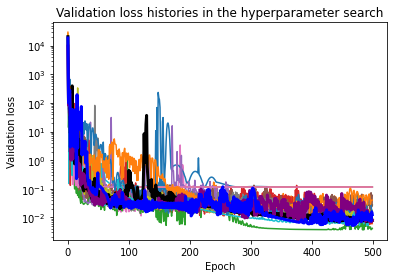

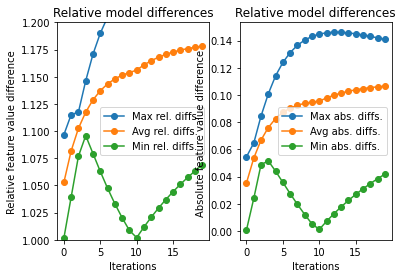

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


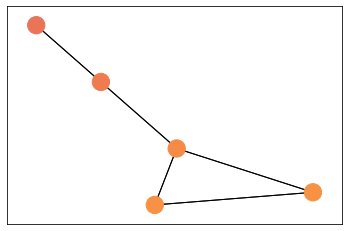

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


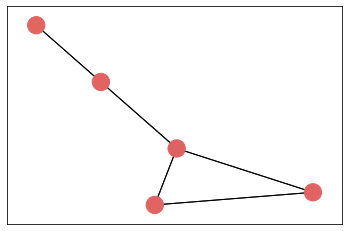

tensor([[0.5986],
        [0.5986],
        [0.5930],
        [0.6000],
        [0.6075]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                   5
loss                                  0.059278
score                                 0.767715
equation        ((xs * -2.6309328) + 1.650251)
sympy_format           1.650251 - 2.6309328*xs
Name: 2, dtype: object, 'update_sr_result': complexity                                     5
loss                                    0.000389
score                                   1.543834
equation        ((a * 0.67616796) - -0.18268661)
sympy_format           0.67616796*a + 0.18268661
Name: 2, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle True>}


In [3]:
gn1, hps1, model1, sr1 = view_run_results('runs/PAPER_diff1')

In [9]:
hp_stats(hps1, gn1)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.9, 0.999),
   'epochs': 500,
   1: 1,
   2: 1,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.00416335416957736},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.7, 0.97),
   'epochs': 500,
   1: 1,
   2: 1,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.09170669913291932}}

## diff2

Stats for 20 steps for node features:
Greatest relative difference: 258.5620641708374%
Average relative difference: 136.57970070838928%
Smallest relative difference: 100.09912252426147%
Greatest absolute difference: 0.4723726511001587
Average absolute difference: 0.16843891628086566
Smallest absolute difference: 0.00042182207107543945%


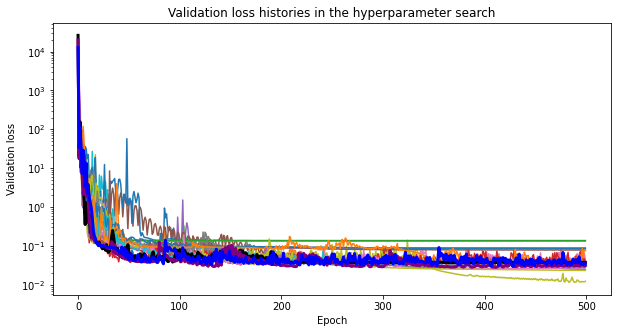

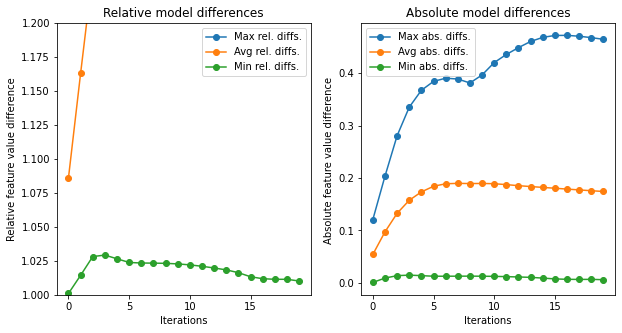

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


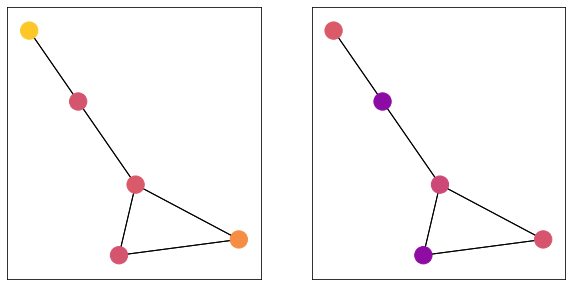

tensor([[0.7274, 0.5470],
        [0.5444, 0.2941],
        [0.5658, 0.5044],
        [0.5431, 0.2930],
        [0.8848, 0.5642]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


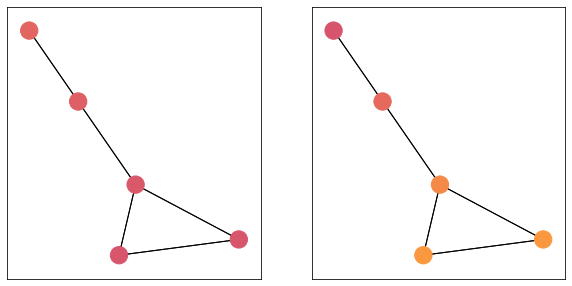

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
{'message_sr_result': [complexity                     1
loss                         NaN
score                        0.0
equation               14.854478
sympy_format    14.8544780000000
Name: 0, dtype: object, complexity                        1
loss                            0.0
score                           0.0
equation                  -0.051855
sympy_format    -0.0518554500000000
Name: 0, dtype: object], 'update_sr_result': [complexity                                       7
loss                                      0.190139
score                                     0.461045
equation         (((xt1 - a1) * -2.4951134) - xt2)
sympy_format    2.4951134*a1 - 2.4951134*xt1 - xt2
Name: 3, dtype: object, complexity                                                    11
loss                                                    0.047891
score                 

In [32]:
gn2, hps2, model2, sr2 = view_run_results('runs/PAPER_diff2')

In [14]:
hp_stats(hps2, gn2)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.7, 0.97),
   'epochs': 500,
   1: 2,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.012430821545422077},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.7, 0.97),
   'epochs': 500,
   1: 2,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.11651797443628312}}

## act_inh_simple

Stats for 20 steps for node features:
Greatest relative difference: 357.97226428985596%
Average relative difference: 123.81296396255492%
Smallest relative difference: 100.13782978057861%
Greatest absolute difference: 0.25811538100242615
Average absolute difference: 0.10289997151121497
Smallest absolute difference: 0.0013071894645690918%


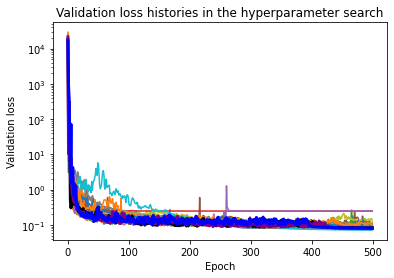

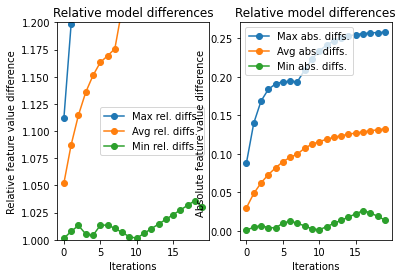

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


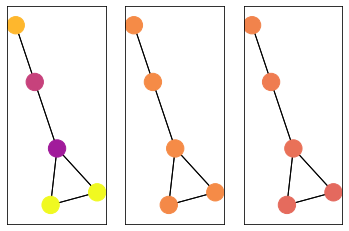

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


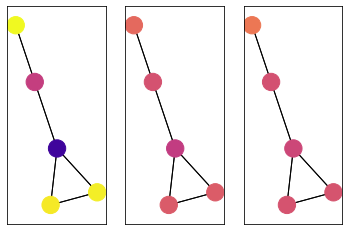

tensor([[0.9765, 0.5711, 0.5458],
        [0.9635, 0.5670, 0.5398],
        [0.0971, 0.4621, 0.5019],
        [0.4699, 0.5384, 0.5330],
        [1.0946, 0.6142, 0.6640]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                       1
loss                           0.0
score                          0.0
equation                 -0.137347
sympy_format    -0.137347010000000
Name: 0, dtype: object, complexity                        1
loss                            0.0
score                           0.0
equation                  -0.018358
sympy_format    -0.0183582120000000
Name: 0, dtype: object], 'update_sr_result': [complexity                       3
loss                      0.861248
score                     0.426507
equation        (xt2 * -3.4968727)
sympy_format        -3.4968727*xt2
Name: 1, dtype: object, complexity               3
loss              0.094009
score             0.629874
equation        (a2 - xt2)
sympy_format      a2 - xt2
Name: 1, dtype: objec

In [16]:
gn_as, hps_as, model_as, sr_as = view_run_results('runs/PAPER_act_inh_simple')

In [17]:
hp_stats(hps_as, gn_as)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.85, 0.985),
   'epochs': 500,
   1: 3,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.07249189913272858},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.85, 0.985),
   'epochs': 500,
   1: 3,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.1602480798959732}}

## act_inh_full

Stats for 20 steps for node features:
Greatest relative difference: 84350.732421875%
Average relative difference: 1378.49154651165%
Smallest relative difference: 100.20695924758911%
Greatest absolute difference: 3684.33251953125
Average absolute difference: 39.89603570662439
Smallest absolute difference: 0.0021210908889770508%


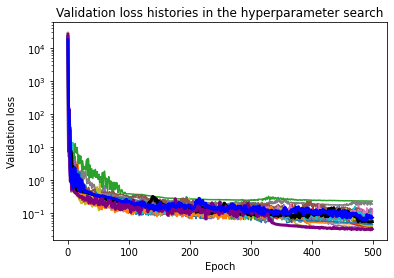

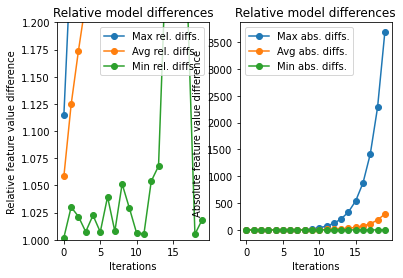

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


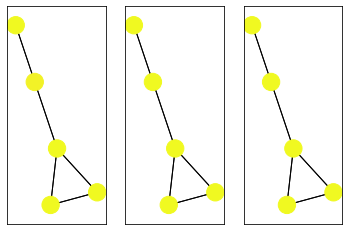

tensor([[ 1.8535,  2.2691,  4.3731],
        [ 1.6086,  3.2191, 17.2088],
        [ 1.2509,  3.3355,  6.2111],
        [ 0.9823,  4.7340,  4.5612],
        [ 1.4918,  4.1609, 13.1401]])
The ground truth model finished the run outputting this graph:


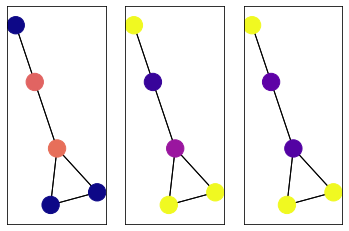

tensor([[-2.3410e+01,  6.8357e+02,  3.6887e+03],
        [-8.9407e-02,  5.1656e+00,  1.7529e+01],
        [ 6.3497e-01,  3.2981e-01,  1.4369e-01],
        [ 5.9856e-01,  8.0426e-02,  1.7187e-01],
        [-3.1767e-01,  7.8938e+00,  3.9643e+01]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                       1
loss                           0.0
score                          0.0
equation                 -0.114095
sympy_format    -0.114095144000000
Name: 0, dtype: object, complexity                      1
loss                          0.0
score                         0.0
equation                 0.116011
sympy_format    0.116010540000000
Name: 0, dtype: object], 'update_sr_result': [complexity                                                     15
loss                                                     1.524372
score                                                    0.200155
equation        ((((a2 - 1.0700171) * (xt2 / (1.0923223 - xt2)...
sympy_format    xt2*(a2 - 

In [37]:
gn_af, hps_af, model_af, sr_af = view_run_results('runs/PAPER_act_inh_full')

In [39]:
decision_tree_paths(get_hyperparam_dtree(hps_af, eq_threshold=0.0))

[[('adam_betas', (0.8, 0.98)), -1.3129512092580153],
 [('adam_betas', (0.85, 0.985)), -1.2782711821311836],
 [('adam_betas', (0.7, 0.97)), -1.2304391613948211],
 [('adam_betas', (0.9, 0.999)), -1.1974309468520865],
 [('adam_betas', (0.97, 0.9997)), -0.8982243604988431]]

In [19]:
hp_stats(hps_af, gn_af)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.7, 0.97),
   'epochs': 500,
   1: 3,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 0.03302384912967682},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-08,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 4,
   'adam_weight_decay': 0,
   'adam_betas': (0.9, 0.999),
   'epochs': 500,
   1: 3,
   2: 2,
   3: [300, 300],
   4: torch.nn.modules.activation.ReLU,
   5: False},
  'minimum': 6.007828804850578}}

# Linear

## diff1

Stats for 20 steps for node features:
Greatest relative difference: 103.90352010726929%
Average relative difference: 101.84995412826538%
Smallest relative difference: 100.0272274017334%
Greatest absolute difference: 0.027777552604675293
Average absolute difference: 0.012956985202617944
Smallest absolute difference: 0.0001481175422668457%


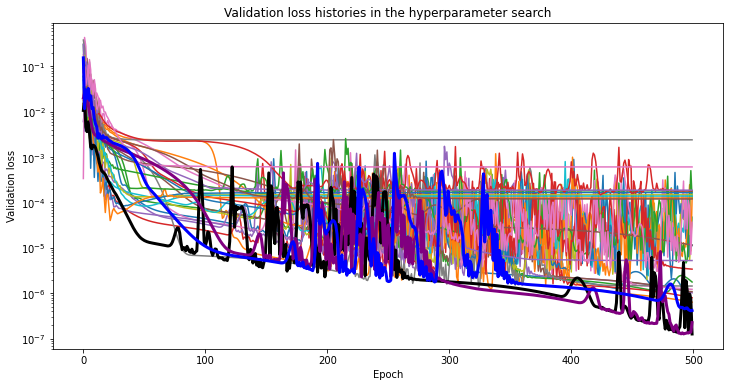

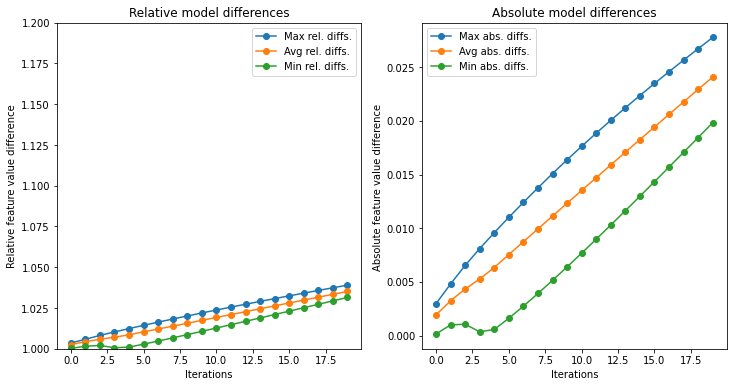

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


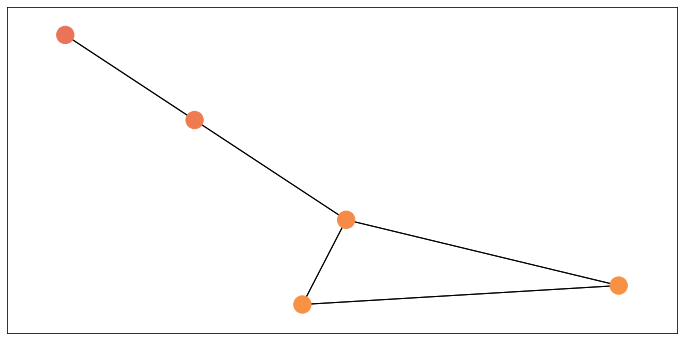

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


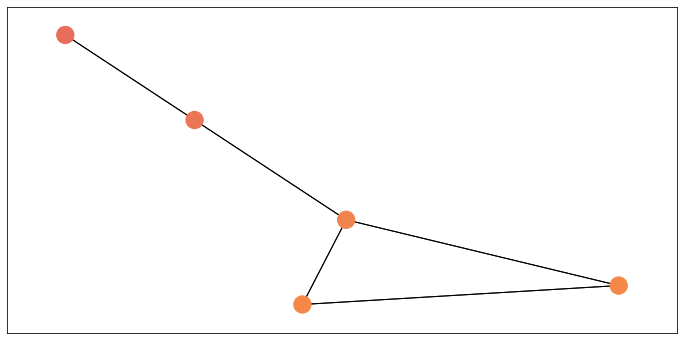

tensor([[0.7116],
        [0.7116],
        [0.6984],
        [0.6584],
        [0.6295]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                                      9
loss                                                          0.0
score                                                         inf
equation        ((((xs * 1.0387459) + -0.02002364) - xt) * -0....
sympy_format    -0.80015344574048*xs + 0.7703072*xt + 0.015424...
Name: 4, dtype: object, 'update_sr_result': complexity                                                      9
loss                                                          0.0
score                                                         inf
equation        (((a + 0.007535479) * 0.9855398) + (xt * -0.12...
sympy_format     0.9855398*a - 0.12478184*xt + 0.0074265144665642
Name: 4, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 tr

In [25]:
gn1l, hps1l, model1l, sr1l = view_run_results('runs/linear_diff1')

In [21]:
hp_stats(hps1l, gn1l)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-06,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 1,
   2: 1,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 1.2625611134353676e-07},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-06,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 1,
   2: 1,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.005368609447032213}}

## diff2

Stats for 20 steps for node features:
Greatest relative difference: 110.22578477859497%
Average relative difference: 104.01351630687714%
Smallest relative difference: 100.01363754272461%
Greatest absolute difference: 0.07040464878082275
Average absolute difference: 0.024799847370013596
Smallest absolute difference: 9.381771087646484e-05%


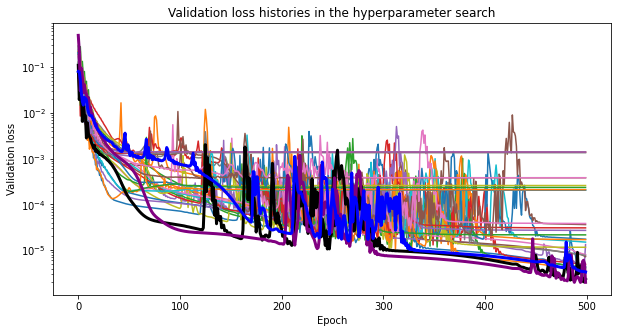

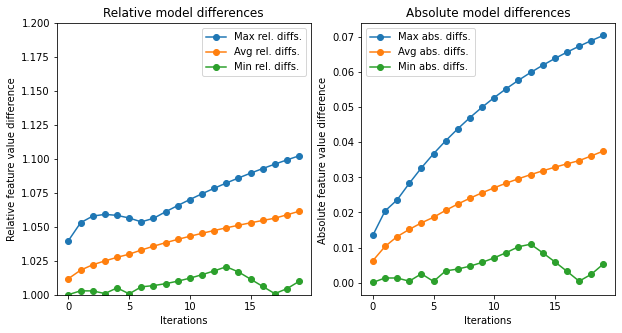

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


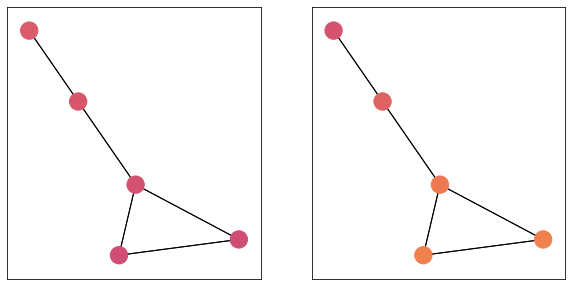

tensor([[0.5231, 0.6885],
        [0.5229, 0.6886],
        [0.5345, 0.6659],
        [0.5542, 0.5929],
        [0.5671, 0.5424]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


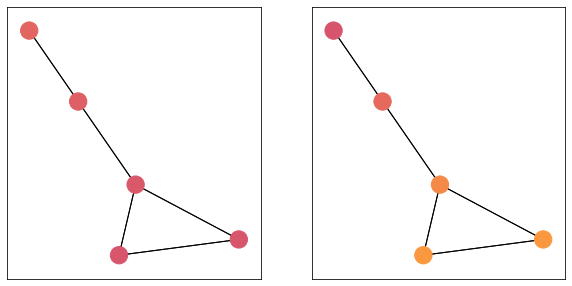

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
{'message_sr_result': [complexity                                                     19
loss                                                          0.0
score                                                    3.867788
equation        ((((((xs1 / 0.63832176) + (xs2 - xt2)) - (xs2 ...
sympy_format    -0.649972750419788*xs1 - 0.510499214019795*xs2...
Name: 9, dtype: object, complexity                                                     19
loss                                                          0.0
score                                                         inf
equation        ((((xt2 + -0.015547173) - (((xt1 - xs1) * 0.85...
sympy_format    -0.366106749328638*xs1 + 0.45760357*xs2 + 0.32...
Name: 9, dtype: object], 'update_sr_result': [complexity                      3
loss                     0.002065
score                    0.851061
equation      

In [31]:
gn2l, hps2l, model2l, sr2l = view_run_results('runs/linear_diff2')

In [23]:
hp_stats(hps2l, gn2l)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-06,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 2,
   2: 2,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 1.999242158490233e-06},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-06,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 2,
   2: 2,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.02083600014448166}}

## act_inh_simple

Stats for 20 steps for node features:
Greatest relative difference: 208.35888385772705%
Average relative difference: 133.81377756595612%
Smallest relative difference: 100.1763105392456%
Greatest absolute difference: 0.891196608543396
Average absolute difference: 0.185277171805501
Smallest absolute difference: 0.0016531944274902344%


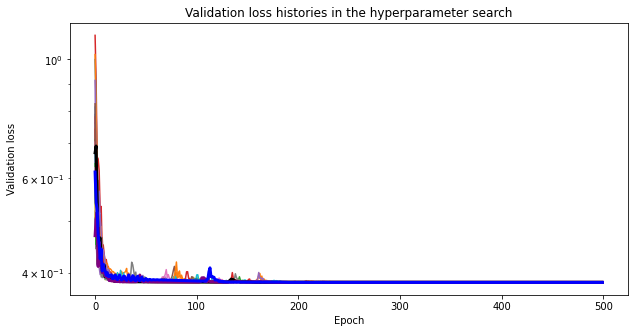

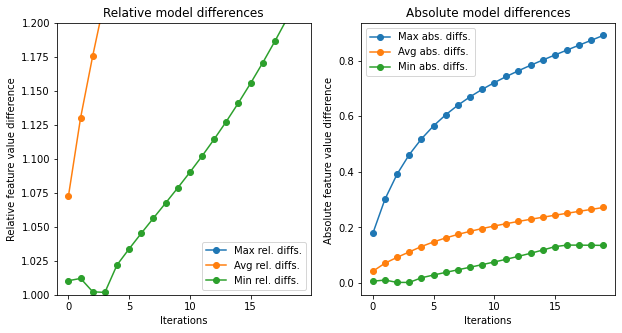

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


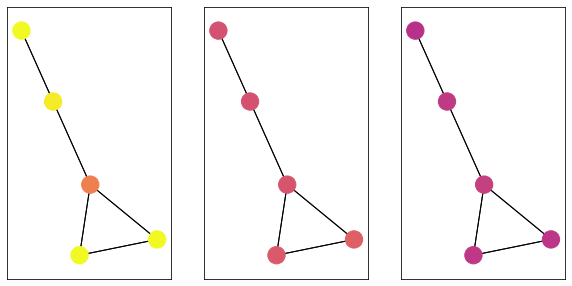

tensor([[1.9774, 0.5841, 0.4383],
        [1.3210, 0.5631, 0.4464],
        [0.6856, 0.5494, 0.4746],
        [0.9683, 0.5367, 0.4545],
        [1.0291, 0.5346, 0.4231]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


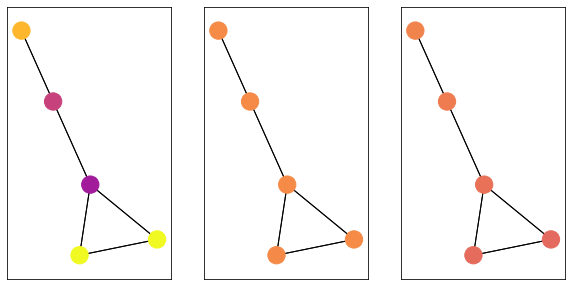

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
{'message_sr_result': [complexity                                                     11
loss                                                     0.001424
score                                                     0.39939
equation        (((((xs2 * 1.6264509) + xs3) - xt3) * -0.29256...
sympy_format    -0.475848072433524*xs2 - 0.29256836*xs3 + 0.29...
Name: 5, dtype: object, complexity                                                     15
loss                                                     0.000035
score                                                    0.954698
equation        ((((xs3 + ((xt3 + -0.29600543) * -0.6351769)) ...
sympy_format    -0.28811643*xs2 + 0.28811643*xs3 + 0.114842085...
Name: 7, dtype: object], 'update_sr_result': [complexity                                                     13
loss      

In [36]:
gnal, hpsal, modelal, sral = view_run_results('runs/linear_act_inh_simple')

In [37]:
hp_stats(hpsal, gnal)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 2,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 3,
   2: 2,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.38401859998703003},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 50,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 3,
   2: 2,
   3: [],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.19897393882274628}}

# Fine-tuned

## diff1

Stats for 20 steps for node features:
Greatest relative difference: 105.67388534545898%
Average relative difference: 103.18490326404573%
Smallest relative difference: 100.10987520217896%
Greatest absolute difference: 0.04122030735015869
Average absolute difference: 0.022094496199861167
Smallest absolute difference: 0.0007819533348083496%


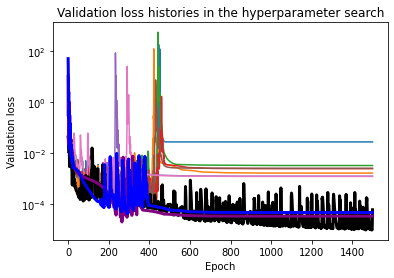

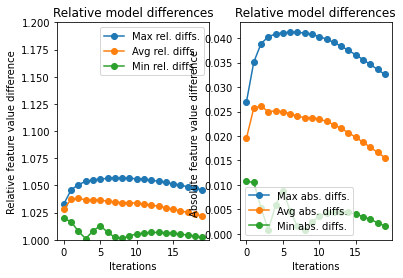

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


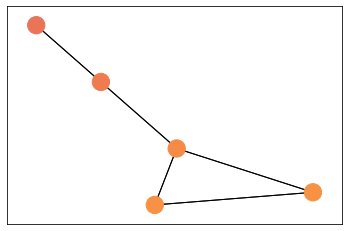

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


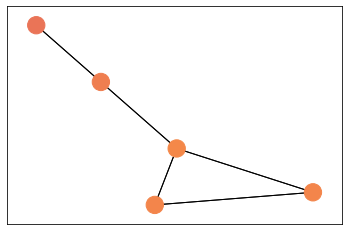

tensor([[0.7068],
        [0.7068],
        [0.7131],
        [0.6810],
        [0.6513]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                  5
loss                                 0.000242
score                                1.740505
equation            ((xt - xs) * -0.24516167)
sympy_format    0.24516167*xs - 0.24516167*xt
Name: 2, dtype: object, 'update_sr_result': complexity                                                9
loss                                               0.000816
score                                              0.538951
equation        (a + ((0.5053277 - (a * 0.37709332)) * xt))
sympy_format              a + xt*(0.5053277 - 0.37709332*a)
Name: 4, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle False>}


In [24]:
gn1x, hps1x, model1x, sr1x = view_run_results('runs/PRECISE1_diff1')

In [25]:
hp_stats(hps1x, gn1x)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-05,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 1500,
   1: 1,
   2: 1,
   3: [64],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 3.390394340385683e-05},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': 1e-05,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 1500,
   1: 1,
   2: 1,
   3: [16, 16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.03838062770664692}}

## diff2

Stats for 20 steps for node features:
Greatest relative difference: 103.01936864852905%
Average relative difference: 100.78579664230347%
Smallest relative difference: 100.00301599502563%
Greatest absolute difference: 0.018281280994415283
Average absolute difference: 0.00481766756856814
Smallest absolute difference: 1.2159347534179688e-05%


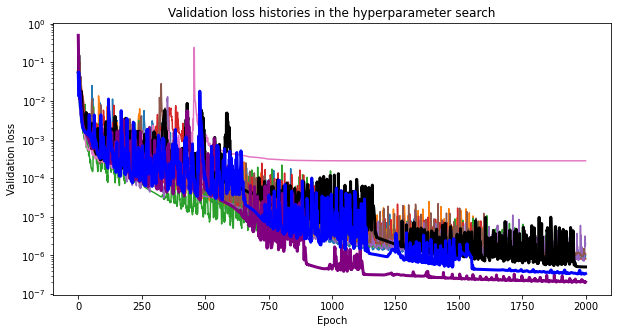

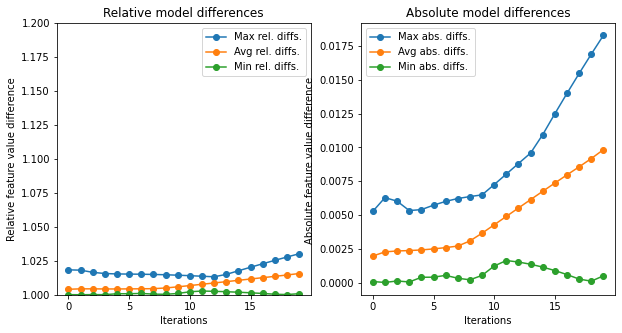

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


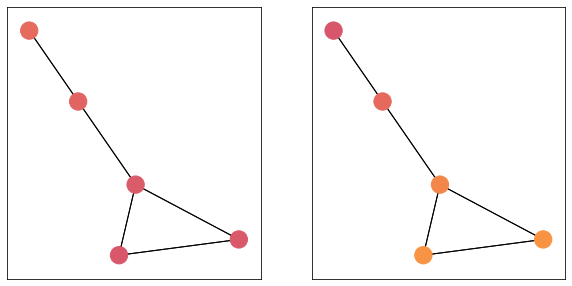

tensor([[0.5587, 0.7450],
        [0.5583, 0.7451],
        [0.5682, 0.7087],
        [0.5989, 0.6172],
        [0.6237, 0.5530]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


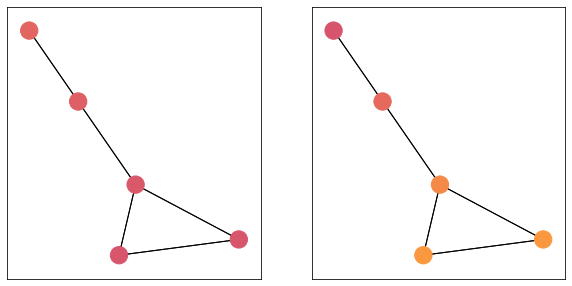

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
{'message_sr_result': [complexity                                                     11
loss                                                      0.00005
score                                                    2.388992
equation        (((((xs1 - xt1) * -0.46669757) + xs2) - xt2) *...
sympy_format    -0.381551048515743*xs1 + 0.81755525*xs2 + 0.38...
Name: 5, dtype: object, complexity                                                     11
loss                                                     0.000075
score                                                    2.369635
equation        ((xs1 - (xt1 + ((xt2 - xs2) * 0.5701733))) * 0...
sympy_format    0.73039186*xs1 + 0.416449937109338*xs2 - 0.730...
Name: 5, dtype: object], 'update_sr_result': [complexity                                                      9
loss                                              

In [34]:
gn2x, hps2x, model2x, sr2x = view_run_results('runs/PRECISE1_diff2')

In [35]:
get_hyperparam_dtree(hps2x, eq_threshold=0)

<<<DTREE on <ATTRIBUTE 3 taking values ([16, 16, 16], [16])
  --((16, 16, 16))-->
  <LEAF of avg.val (-6.062670411274834, 1) with 5 examples and variance 5.0053140829339935e-14>
  --((16,))-->
  <LEAF of avg.val (-5.692463079676061, 1) with 5 examples and variance 1.267873965672666e-08> >>>

In [29]:
hp_stats(hps2x, gn2x)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 75,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 1e-07,
   'epochs': 2000,
   1: 2,
   2: 2,
   3: [16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 2.0642043807583832e-07},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 75,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 1e-07,
   'epochs': 2000,
   1: 2,
   2: 2,
   3: [16, 16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.002543103136122227}}

## diff3

Stats for 20 steps for node features:
Greatest relative difference: 105.88937997817993%
Average relative difference: 101.16070628166199%
Smallest relative difference: 100.00365972518921%
Greatest absolute difference: 0.03881889581680298
Average absolute difference: 0.0074960403027944265
Smallest absolute difference: 2.2351741790771484e-05%


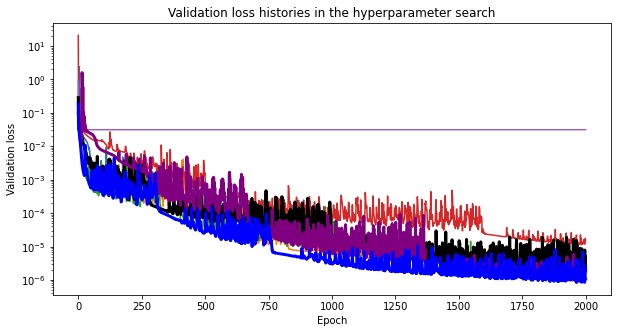

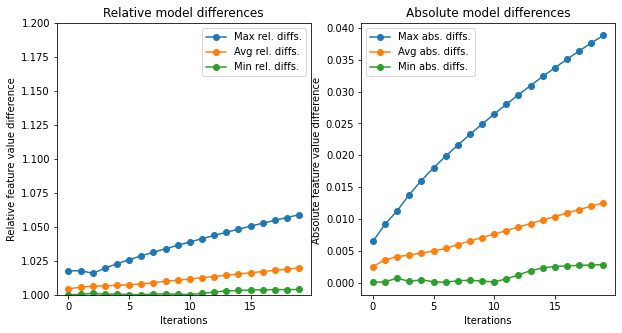

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


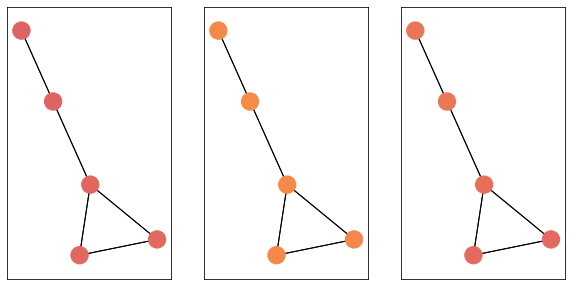

tensor([[0.6115, 0.7147, 0.6096],
        [0.6116, 0.7142, 0.6165],
        [0.6060, 0.7174, 0.6356],
        [0.5954, 0.7188, 0.6570],
        [0.5898, 0.7159, 0.6591]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


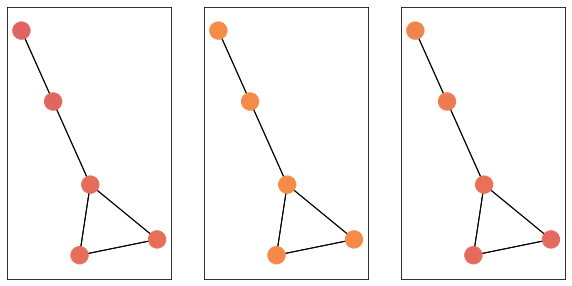

tensor([[0.6341, 0.7191, 0.6156],
        [0.6341, 0.7187, 0.6241],
        [0.6268, 0.7203, 0.6425],
        [0.6088, 0.7222, 0.6790],
        [0.5968, 0.7212, 0.6980]])
{'message_sr_result': [complexity                                                      9
loss                                                     0.000568
score                                                    1.825053
equation               ((xt2 + (xt1 - (xs1 + xs2))) * 0.63471156)
sympy_format    -0.63471156*xs1 - 0.63471156*xs2 + 0.63471156*...
Name: 4, dtype: object, complexity                                                     15
loss                                                     0.000234
score                                                    0.828622
equation        ((xs2 - ((((xs1 - (xt1 - xt3)) - xs3) / -1.759...
sympy_format    0.144221327244743*xs1 + 0.25371775*xs2 - 0.144...
Name: 7, dtype: object, complexity                                                     11
loss                            

In [40]:
gn3x, hps3x, model3x, sr3x = view_run_results('runs/three_vardiff3')

In [41]:
hp_stats(hps3x, gn3x)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 75,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 1e-07,
   'epochs': 2000,
   1: 3,
   2: 3,
   3: [16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 1.055538973560033e-06},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.2,
   'lr_scheduler_patience': 75,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 1e-07,
   'epochs': 2000,
   1: 3,
   2: 3,
   3: [16, 16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.0063204336911439896}}

## act_inh_simple
(two runs)

Stats for 20 steps for node features:
Greatest relative difference: 141.7077898979187%
Average relative difference: 115.81579506397249%
Smallest relative difference: 100.11245012283325%
Greatest absolute difference: 0.20542261004447937
Average absolute difference: 0.08794570723548531
Smallest absolute difference: 0.0005746185779571533%


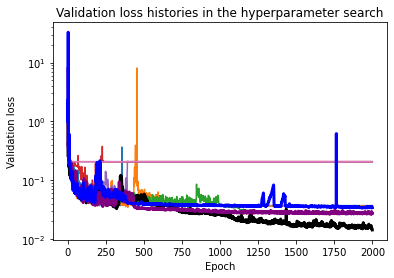

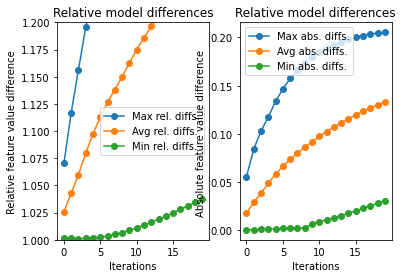

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


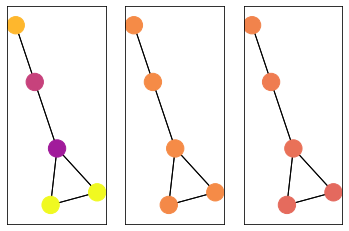

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


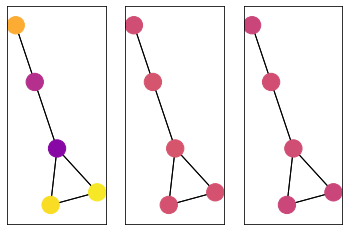

tensor([[0.9596, 0.5378, 0.4936],
        [0.9367, 0.5382, 0.4969],
        [0.2810, 0.5474, 0.5232],
        [0.4179, 0.5437, 0.5260],
        [0.8128, 0.5210, 0.4925]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                        5
loss                                       0.000381
score                                      1.033665
equation        ((xs2 + -0.50588024) * -0.19902961)
sympy_format     0.100685146873906 - 0.19902961*xs2
Name: 2, dtype: object, complexity                                        5
loss                                         0.0002
score                                      0.887728
equation         ((xs3 - 0.48845932) * -0.13252312)
sympy_format    0.0647321530794784 - 0.13252312*xs3
Name: 2, dtype: object], 'update_sr_result': [complexity                                       7
loss                                      0.116217
score                                     0.053427
equation        (a1 + (0.0004056322 /

In [41]:
# deep long search (act_inh_simple_search3)
gn_ax, hps_ax, model_ax, sr_ax = view_run_results('runs/SEARCH3_act_inh_simple')

In [42]:
hp_stats(hps_ax, gn_ax)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 200,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 2000,
   1: 3,
   2: 2,
   3: [32, 32, 32],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.014244072139263153},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 200,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 2000,
   1: 3,
   2: 2,
   3: [32, 32, 32],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.12602176070213317}}

Stats for 20 steps for node features:
Greatest relative difference: 126.29386186599731%
Average relative difference: 102.93733537197114%
Smallest relative difference: 100.00215768814087%
Greatest absolute difference: 0.10081180930137634
Average absolute difference: 0.01684172998648137
Smallest absolute difference: 1.4841556549072266e-05%


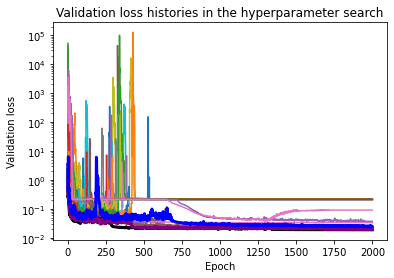

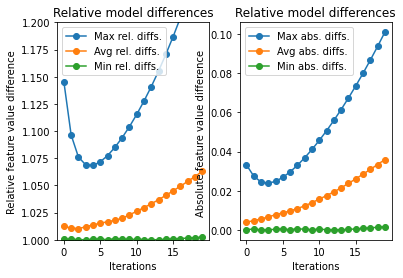

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


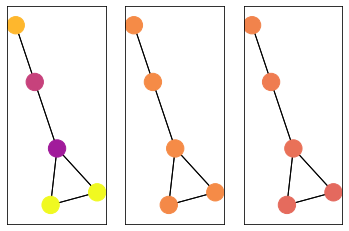

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


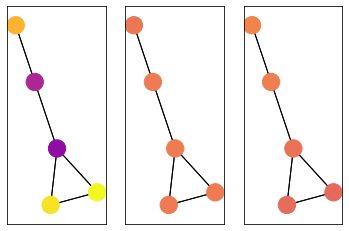

tensor([[1.0178, 0.6752, 0.6198],
        [0.9471, 0.6750, 0.6289],
        [0.2991, 0.6791, 0.6447],
        [0.3834, 0.6732, 0.6806],
        [0.8308, 0.6619, 0.7008]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                                     11
loss                                                     0.000831
score                                                    1.107527
equation        (((((xs3 - xt3) * 0.5181807) - xs2) + xt2) * 0...
sympy_format    -0.5867925*xs2 + 0.30406454840475*xs3 + 0.5867...
Name: 5, dtype: object, complexity                                                      9
loss                                                     0.000918
score                                                    1.402203
equation               (((xs2 - xt2) + (xs3 - xt3)) * -0.4366785)
sympy_format    -0.4366785*xs2 - 0.4366785*xs3 + 0.4366785*xt2...
Name: 4, dtype: object], 'update_sr_result': [complexity                                        

In [43]:
# long shallow search
gn_as, hps_as, model_as, sr_as = view_run_results('runs/SHALLOW_act_inh_simple')

In [44]:
hp_stats(hps_as, gn_as)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 200,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 2000,
   1: 3,
   2: 2,
   3: [32],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.01901789754629135},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 200,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 2000,
   1: 3,
   2: 2,
   3: [32],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.09066381342709065}}

# General

## diff1

Stats for 20 steps for node features:
Greatest relative difference: 107.05564022064209%
Average relative difference: 102.51942157745361%
Smallest relative difference: 100.02539157867432%
Greatest absolute difference: 0.04279381036758423
Average absolute difference: 0.016960204887436704
Smallest absolute difference: 0.00016117095947265625%


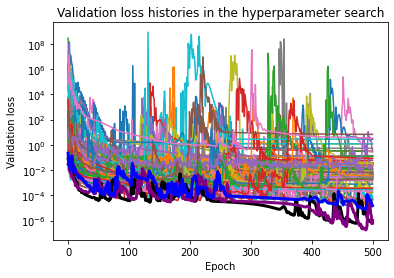

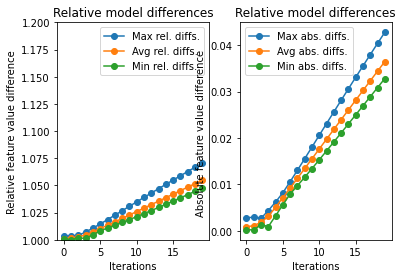

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


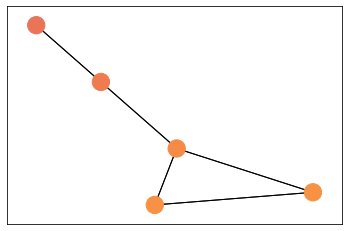

tensor([[0.7394],
        [0.7394],
        [0.7224],
        [0.6795],
        [0.6493]])
The ground truth model finished the run outputting this graph:


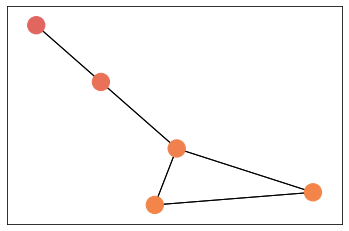

tensor([[0.7044],
        [0.7045],
        [0.6896],
        [0.6425],
        [0.6065]], grad_fn=<AddmmBackward0>)
{'message_sr_result': complexity                                 5
loss                                0.000559
score                               1.849802
equation             ((xt - xs) * 0.6246547)
sympy_format    -0.6246547*xs + 0.6246547*xt
Name: 2, dtype: object, 'update_sr_result': complexity                             5
loss                            0.000046
score                           1.907153
equation        ((xt * -0.14862719) + a)
sympy_format           a - 0.14862719*xt
Name: 2, dtype: object, 'message_variable_order': [xt, xs], 'update_variable_order': [xt, a], 'data_trained_on': <gninvert.data_generation.TrainingData, 6 train size / 2 validation size / shuffle False>}


In [3]:
gn1g, hps1g, model1g, sr1g = view_run_results('runs/GENERAL_diff1')

In [4]:
hp_stats(hps1g, gn1g)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 1,
   2: 1,
   3: [16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 6.593945727217942e-07},
 'prediction_error': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 1,
   2: 1,
   3: [16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.006967904511839151}}

## diff2

Stats for 20 steps for node features:
Greatest relative difference: 140.65654277801514%
Average relative difference: 114.80736076831816%
Smallest relative difference: 100.00033378601074%
Greatest absolute difference: 0.21969479322433472
Average absolute difference: 0.08224515095353127
Smallest absolute difference: 1.7881393432617188e-06%


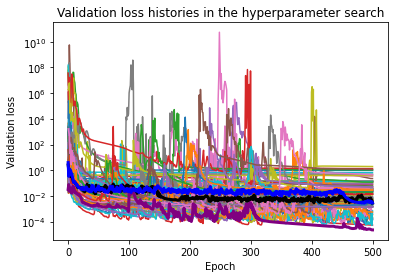

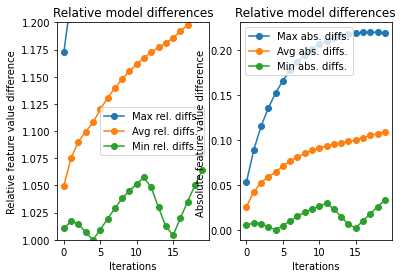

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


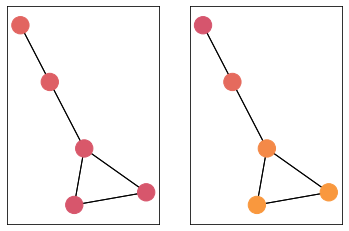

tensor([[0.5514, 0.7589],
        [0.5511, 0.7589],
        [0.5601, 0.7187],
        [0.5848, 0.6177],
        [0.6055, 0.5478]])
The ground truth model finished the run outputting this graph:


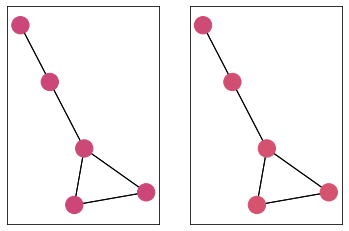

tensor([[0.5020, 0.5396],
        [0.5020, 0.5396],
        [0.5047, 0.5379],
        [0.5019, 0.5236],
        [0.4976, 0.5147]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                3
loss               0.020524
score              0.808615
equation        (xs1 - xt1)
sympy_format      xs1 - xt1
Name: 1, dtype: object, complexity                3
loss               0.032408
score              0.843828
equation        (xs2 - xt2)
sympy_format      xs2 - xt2
Name: 1, dtype: object], 'update_sr_result': [complexity                                                      9
loss                                                     0.000076
score                                                    0.691599
equation        (((a1 + (xt1 * 0.1267788)) - -0.043961965) * 0...
sympy_format    0.8946484*a1 + 0.11342245057392*xt1 + 0.039330...
Name: 4, dtype: object, complexity                                      5
loss                                     0.000698
score           

In [5]:
gn2g, hps2g, model2g, sr2g = view_run_results('runs/GENERAL_diff2')

In [6]:
hp_stats(hps2g, gn2g)

{'final_val_loss': {'minimised_by': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 2,
   2: 2,
   3: [16, 16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 2.3178210540208966e-05},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 2,
   2: 2,
   3: [64],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.06417966708540916}}

## act_inh_simple

Stats for 20 steps for node features:
Greatest relative difference: 17089.505004882812%
Average relative difference: 238.7640583515167%
Smallest relative difference: 100.03526210784912%
Greatest absolute difference: 0.33534884452819824
Average absolute difference: 0.08344250847585499
Smallest absolute difference: 0.00033211708068847656%


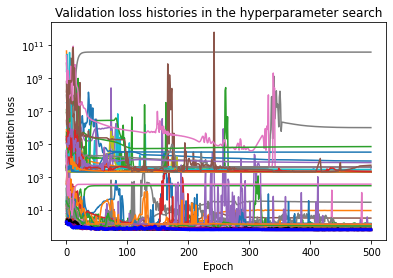

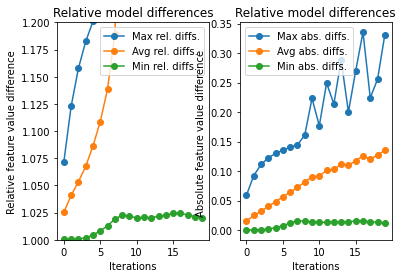

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


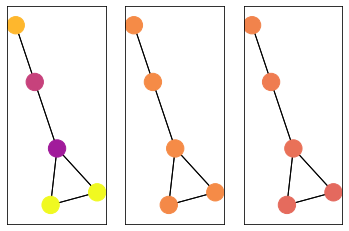

tensor([[1.0862, 0.7191, 0.6156],
        [1.0024, 0.7187, 0.6241],
        [0.3478, 0.7203, 0.6425],
        [0.4842, 0.7222, 0.6790],
        [0.8434, 0.7212, 0.6980]])
The ground truth model finished the run outputting this graph:


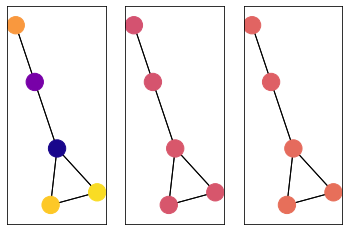

tensor([[0.9304, 0.5543, 0.6350],
        [0.8845, 0.5544, 0.6363],
        [0.0165, 0.5582, 0.6220],
        [0.2381, 0.5459, 0.5843],
        [0.7607, 0.5372, 0.6015]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                                      5
loss                                     0.002622
score                                     0.91558
equation        ((xs3 * -0.5886848) + 0.28470114)
sympy_format           0.28470114 - 0.5886848*xs3
Name: 2, dtype: object, complexity                       3
loss                      0.006273
score                     1.224054
equation        (xs2 + -0.5105007)
sympy_format       xs2 - 0.5105007
Name: 1, dtype: object], 'update_sr_result': [complexity                                                     11
loss                                                     0.002345
score                                                    0.811291
equation        (a1 - ((xt1 - a2) / ((a1 / 0.071314014) + 0.47...
sympy_format    a1 - 

In [9]:
gnag, hpsag, modelag, srag = view_run_results('runs/GENERAL_act_inh_simple')

In [10]:
hp_stats(hpsag, gnag)

{'final_val_loss': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 3,
   2: 2,
   3: [16, 16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.5963997840881348},
 'prediction_error': {'minimised_by': {'loss_func': L1Loss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 3,
   2: 2,
   3: [16, 16],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'minimum': 0.13067981004714965}}

## act_inh_full

Stats for 20 steps for node features:
Greatest relative difference: nan%
Average relative difference: nan%
Smallest relative difference: nan%
Greatest absolute difference: nan
Average absolute difference: nan
Smallest absolute difference: nan%


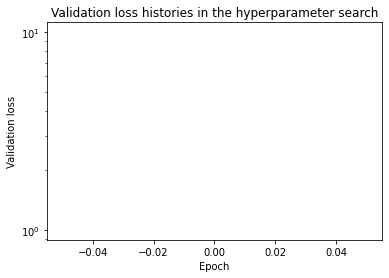

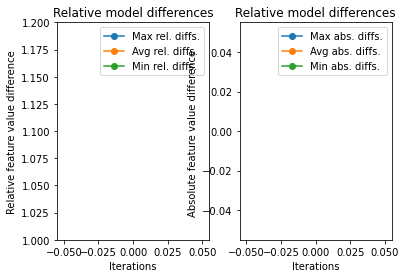

Both models were ran for 20 steps
The model being tested finished the run outputting this graph:


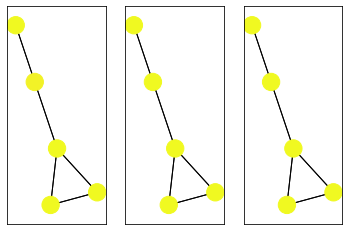

tensor([[ 1.8535,  2.2691,  4.3731],
        [ 1.6086,  3.2191, 17.2088],
        [ 1.2509,  3.3355,  6.2111],
        [ 0.9823,  4.7340,  4.5612],
        [ 1.4918,  4.1609, 13.1401]])
The ground truth model finished the run outputting this graph:


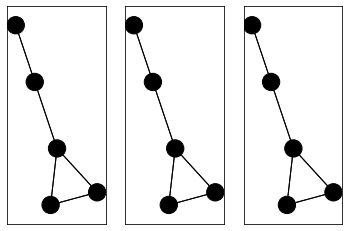

tensor([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]], grad_fn=<AddmmBackward0>)
{'message_sr_result': [complexity                         3
loss                             NaN
score                            inf
equation        (xs3 * 0.0024928718)
sympy_format        0.0024928718*xs3
Name: 1, dtype: object, complexity                3
loss                    NaN
score                   inf
equation        (xs2 - xs1)
sympy_format     -xs1 + xs2
Name: 1, dtype: object], 'update_sr_result': [complexity                      3
loss                          NaN
score                         inf
equation        (a2 - -1.5237604)
sympy_format       a2 + 1.5237604
Name: 1, dtype: object, complexity                        3
loss                            NaN
score                           inf
equation        (xt2 - -0.08190939)
sympy_format       xt2 + 0.08190939
Name: 1, dtype: object, complexity                      

In [17]:
gnafg, hpsafg, modelafg, srafg = view_run_results('runs/GENERAL_act_inh_full')

In [16]:
hpsafg

[{'settings': {'loss_func': MSELoss(),
   'optimizer': 'adam',
   'regularization_coefficient': False,
   'regularization_norm': 1,
   'starting_lr': 0.1,
   'lr_scheduler_dec_factor': 0.1,
   'lr_scheduler_patience': 100,
   'lr_scheduler_cooldown': 1,
   'batch_size': 2,
   'adam_weight_decay': 0,
   'epochs': 500,
   1: 3,
   2: 2,
   3: [64],
   4: torch.nn.modules.activation.GELU,
   5: False},
  'model': GNN_full(),
  'score': None,
  'val_loss_history': [nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
 

In [15]:
hp_stats(hpsafg, gnafg)

TypeError: 'NoneType' object is not subscriptable